In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import requests

from src.data.dataloader import DataLoader

%load_ext autoreload
%autoreload 2

In [3]:
dataloader = DataLoader()

In [4]:
characters = dataloader.load_characters()
print(len(characters))
characters.head()

450787


,wikipedia_movie_id,wikidata_movie_id,character_name,actor_date_of_birth,actor_gender,actor_height_meters,actor_name,actor_age_at_release,ethnicity,wikidata_character_id,wikidata_actor_id
0,975900,Q261700,Akooshay,1958-08-26,F,1.620,Wanda De Jesus,42.0,NaN,NaN,Q1873468
1,975900,Q261700,Lieutenant Melanie Ballard,1974-08-15,F,1.780,Natasha Henstridge,27.0,NaN,NaN,Q230527
2,975900,Q261700,Desolation Williams,1969-06-15,M,1.727,Ice Cube,32.0,African Americans,NaN,Q173637
3,975900,Q261700,Sgt Jericho Butler,1967-09-12,M,1.750,Jason Statham,33.0,NaN,NaN,Q169963
4,975900,Q261700,Bashira Kincaid,1977-09-25,F,1.650,Clea DuVall,23.0,NaN,NaN,Q233347


In [5]:
movies_with_characters = dataloader.load_movies_with_characters()

print(len(movies_with_characters))
movies_with_characters.head()

64330


,wikipedia_movie_id,wikidata_movie_id,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,character_name,actor_gender,actor_height_meters,actor_age_at_release,ethnicity,plot
0,330,Q2823770,Actrius,1996,NaN,90.0,"Catalan language, Spanish Language",Spain,"Drama, Comedy-drama","nan, nan, nan, nan","F, F, F, F","nan, nan, nan, nan","54.0, 29.0, 51.0, 60.0","Spaniards, nan, nan, nan",In order to prepare the role of an important o...
1,3217,Q471992,Army of Darkness,1992,21502796.0,81.0,English Language,United States of America,"Cult, Horror, Stop motion, Costume drama, Acti...","S-Mart Clerk, Fake shemp, Ash Williams, Evil A...","M, M, M, M, M, F, F, F, M, M, M, nan, M, M","1.87, nan, 1.85, 1.85, 1.87, 1.68, 1.73, 1.75,...","26.0, 36.0, 34.0, 34.0, 26.0, 28.0, 27.0, 35.0...","nan, nan, nan, nan, nan, White Americans, Fren...","After being pulled through a time portal, Ash ..."
2,3333,Q220394,The Birth of a Nation,1915,50000000.0,190.0,"Silent film, English Language",United States of America,"Silent film, Indie, Costume drama, Epic, Black...","nan, nan, nan, nan, nan, nan, nan, nan, nan, n...","F, M, F, M, M, F, M, M, M, M, F, F, F, M","1.66, nan, 1.6, nan, nan, nan, 1.8, nan, nan, ...","nan, nan, nan, nan, nan, 11.0, nan, nan, nan, ...","nan, nan, nan, nan, nan, nan, nan, nan, nan, n...",The film follows two juxtaposed families: the...
3,3746,Q184843,Blade Runner,1982,33139618.0,116.0,"Japanese Language, Cantonese, English Language...","United States of America, Hong Kong","Thriller, Cyberpunk, Science Fiction, Future n...","J.F. Sebastian, Rick Deckard, Roy Batty, Racha...","M, M, M, F, F, F, M, M, M, M, M, M, M, M, nan","1.727, 1.85, 1.85, 1.753, 1.78, 1.753, 1.905, ...","34.0, 39.0, 38.0, 22.0, 21.0, 36.0, 37.0, 37.0...","nan, German Americans, Dutch, nan, nan, nan, n...","{{Hatnote}} In Los Angeles, November 2019, ret..."
4,3837,Q957323,Blazing Saddles,1974,119500000.0,93.0,"Yiddish Language, English Language",United States of America,"Western, Satire, Comedy","Gabby Johnson, Taggart, nan, Rev. Johnson, Mon...","M, M, M, M, M, M, M, M, M, F, M, M, M, M, F, M...","nan, 1.91, nan, 1.7, 1.88, 1.78, nan, nan, 1.6...","37.0, 54.0, 64.0, 57.0, 38.0, 40.0, 43.0, 35.0...","nan, nan, nan, nan, nan, Italian Americans, na...","In the American Old West of 1874, construction..."


<Figure size 1200x600 with 0 Axes>

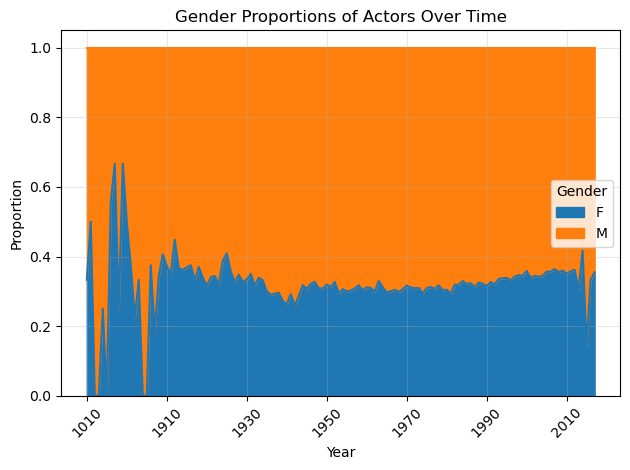

In [6]:
def plot_gender_proportions(df):
    # Split the comma-separated gender values and explode them into separate rows
    df_exploded = df.assign(actor_gender=df["actor_gender"].str.split(",")).explode(
        "actor_gender"
    )

    # Clean up the gender values (strip whitespace) and handle nan values
    df_exploded["actor_gender"] = df_exploded["actor_gender"].str.strip()

    # Remove rows where actor_gender is nan, 'nan', or empty string
    df_exploded = df_exploded[~(df_exploded["actor_gender"] == "nan")]

    # Calculate proportions by year
    proportions = (
        df_exploded.groupby("Movie release date")["actor_gender"]
        .value_counts(normalize=True)
        .unstack()
    )

    # Create the plot
    plt.figure(figsize=(12, 6))
    proportions.plot(kind="area", stacked=True)

    # Customize the plot
    plt.title("Gender Proportions of Actors Over Time")
    plt.xlabel("Year")
    plt.ylabel("Proportion")
    plt.legend(title="Gender")

    # Add grid for better readability
    plt.grid(True, alpha=0.3)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Adjust layout to prevent label cutoff
    plt.tight_layout()

    # Show the plot
    plt.show()


plot_gender_proportions(movies_with_characters)

<Figure size 1200x600 with 0 Axes>

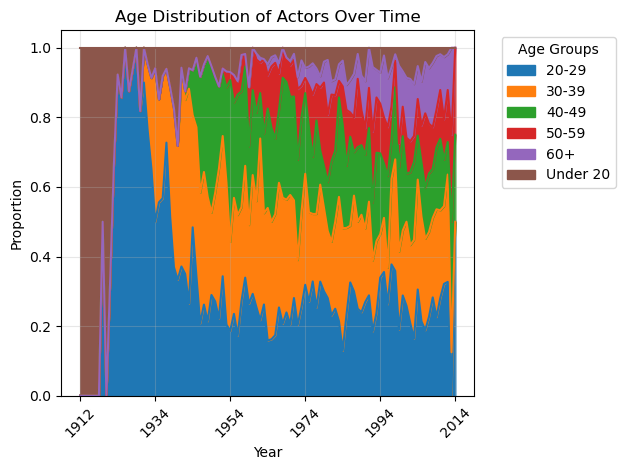

In [7]:
def plot_age_proportions(df):
    # Create age groups
    def categorize_age(age):
        if pd.isna(age):
            return None
        elif age < 20:
            return "Under 20"
        elif age < 30:
            return "20-29"
        elif age < 40:
            return "30-39"
        elif age < 50:
            return "40-49"
        elif age < 60:
            return "50-59"
        else:
            return "60+"

    # Split the comma-separated age values and explode them into separate rows
    df_exploded = df.assign(
        actor_age=df["actor_age_at_release"].str.split(",")
    ).explode("actor_age_at_release")

    # Convert to numeric and clean up
    df_exploded["actor_age_at_release"] = pd.to_numeric(
        df_exploded["actor_age_at_release"], errors="coerce"
    )

    # Create age groups
    df_exploded["age_group"] = df_exploded["actor_age_at_release"].apply(categorize_age)

    # Remove rows where age_group is None
    df_exploded = df_exploded.dropna(subset=["age_group"])

    # Calculate proportions by year
    proportions = (
        df_exploded.groupby("Movie release date")["age_group"]
        .value_counts(normalize=True)
        .unstack()
    )

    # Create the plot
    plt.figure(figsize=(12, 6))
    proportions.plot(kind="area", stacked=True)

    # Customize the plot
    plt.title("Age Distribution of Actors Over Time")
    plt.xlabel("Year")
    plt.ylabel("Proportion")
    plt.legend(title="Age Groups", bbox_to_anchor=(1.05, 1))

    # Add grid for better readability
    plt.grid(True, alpha=0.3)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Adjust layout to prevent label cutoff
    plt.tight_layout()

    plt.show()


# Call the function
plot_age_proportions(movies_with_characters)

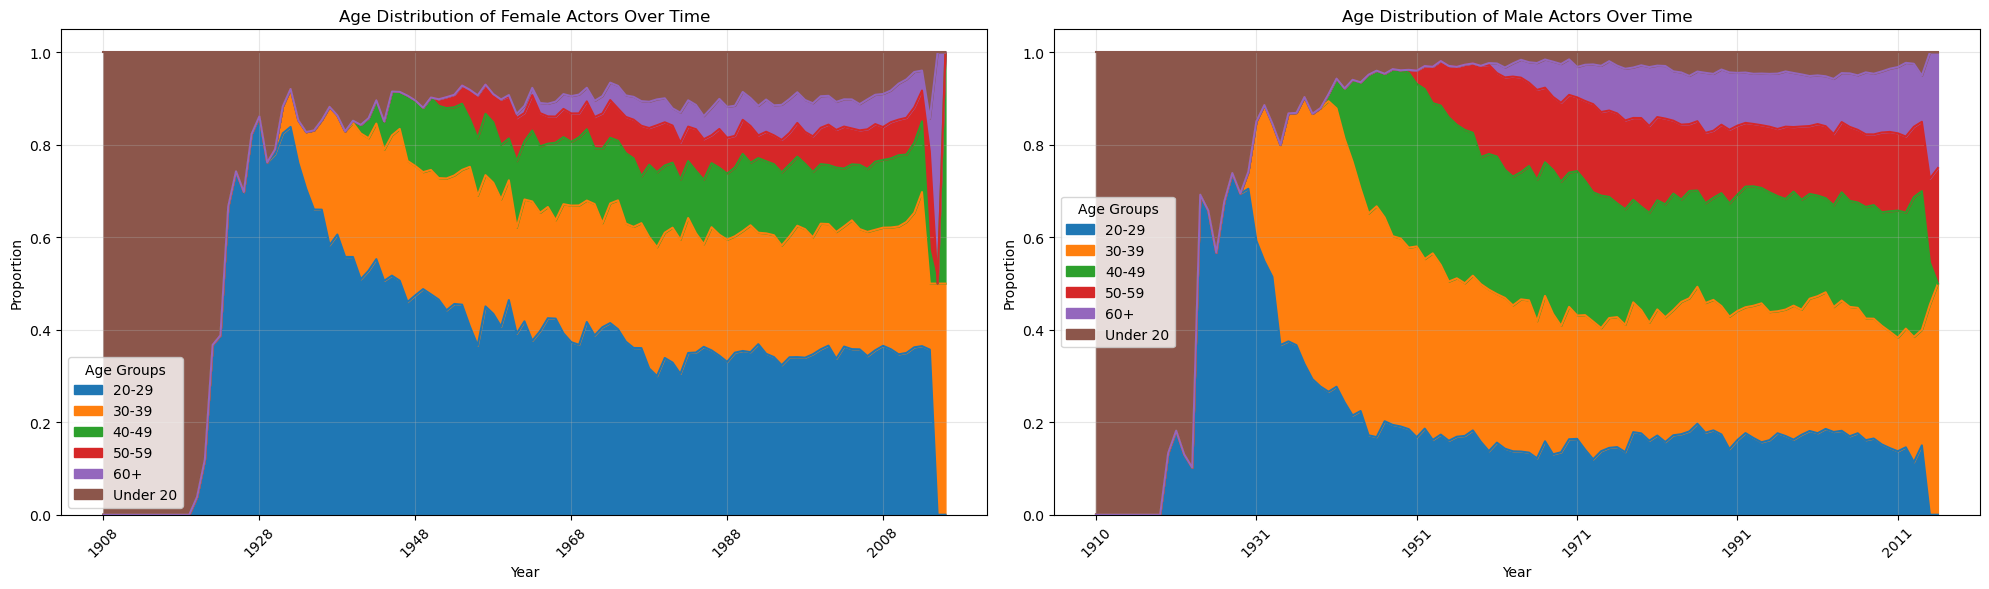

In [8]:
def plot_age_proportions_by_gender(df: pd.DataFrame):
    # Create age groups
    def categorize_age(age):
        if pd.isna(age):
            return None
        elif age < 20:
            return "Under 20"
        elif age < 30:
            return "20-29"
        elif age < 40:
            return "30-39"
        elif age < 50:
            return "40-49"
        elif age < 60:
            return "50-59"
        else:
            return "60+"

    # Split and explode both age and gender columns
    df_exploded = df.assign(
        actor_age=df["actor_age_at_release"].str.split(","),
        actor_gender=df["actor_gender"].str.split(","),
    ).explode(["actor_age", "actor_gender"])

    # Convert age to numeric and clean up
    df_exploded["actor_age"] = pd.to_numeric(df_exploded["actor_age"], errors="coerce")

    # Clean up gender values
    df_exploded["actor_gender"] = df_exploded["actor_gender"].str.strip()

    # Create age groups
    df_exploded["age_group"] = df_exploded["actor_age"].apply(categorize_age)

    # Filter for just M and F genders and remove rows with missing age groups
    df_exploded = df_exploded[
        (df_exploded["actor_gender"].isin(["M", "F"]))
        & (df_exploded["age_group"].notna())
    ]

    # Create separate plots for each gender
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

    for gender, ax, title in zip(["F", "M"], [ax1, ax2], ["Female", "Male"]):
        gender_data = df_exploded[df_exploded["actor_gender"] == gender]

        proportions = (
            gender_data.groupby("Movie release date")["age_group"]
            .value_counts(normalize=True)
            .unstack()
        )

        proportions.plot(kind="area", stacked=True, ax=ax)
        ax.set_title(f"Age Distribution of {title} Actors Over Time")
        ax.set_xlabel("Year")
        ax.set_ylabel("Proportion")
        ax.grid(True, alpha=0.3)
        ax.tick_params(axis="x", rotation=45)
        ax.legend(title="Age Groups")

    plt.tight_layout()
    plt.show()


# Call the function
plot_age_proportions_by_gender(movies_with_characters)

In [ ]:
from concurrent.futures import ThreadPoolExecutor


def get_revenue(wikidata_id):
    url = "https://www.wikidata.org/w/api.php"
    params = {
        "action": "wbgetentities",
        "ids": wikidata_id,
        "format": "json",
        "languages": "en",
    }
    try:
        response = requests.get(url, params=params)
        data = response.json()
        if "entities" in data and wikidata_id in data["entities"]:
            claims = data["entities"][wikidata_id]["claims"]
            if "P2142" in claims:
                box_office_claim = claims["P2142"][0]["mainsnak"]["datavalue"]["value"]
                return float(box_office_claim["amount"])
            else:
                return None
        else:
            return None
    except requests.exceptions.RequestException:
        return None


# Assume get_revenue is already defined
def update_movie_revenue(movie_df):
    def process_row(index, row):
        if pd.notna(row["Movie box office revenue"]):
            return index, row["Movie box office revenue"]

        revenue = get_revenue(row["wikidata_movie_id"])
        if revenue == 0:
            revenue = None

        print(f"revenue for index {index}: {revenue}")
        return index, revenue

    # Create a thread pool executor
    with ThreadPoolExecutor() as executor:
        # Submit tasks to the thread pool
        futures = {
            executor.submit(process_row, index, row): index
            for index, row in movie_df.iterrows()
        }

        # Wait for each future to complete and update the DataFrame
        for future in futures:
            index, revenue = future.result()
            movie_df.at[index, "Movie box office revenue"] = revenue

    return movie_df


# print the number of movies with revenue
print(
    len(
        movies_with_characters[
            movies_with_characters["Movie box office revenue"].notna()
        ]
    )
)
movies_with_characters = update_movie_revenue(movies_with_characters)

In [9]:
# print the new number of movies with revenue
print(
    len(
        movies_with_characters[
            movies_with_characters["Movie box office revenue"].notna()
        ]
    )
)

8223


<Axes: title={'center': 'Top 20 genres'}, xlabel='Movie Genre', ylabel='Count'>

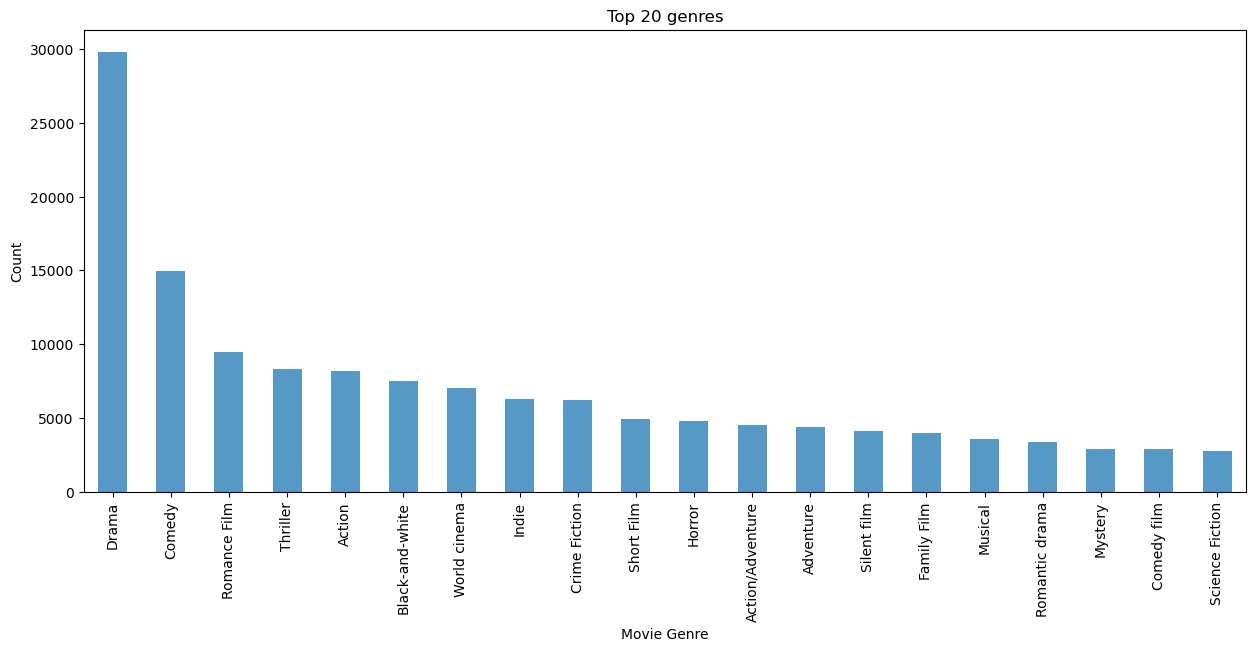

In [10]:
genre_counts = (
    movies_with_characters["Movie genres"].str.split(", ").explode().value_counts()
)

plt.figure(figsize=(15, 6))
genre_counts[:20].plot(
    kind="bar", title="Top 20 genres", ylabel="Count", xlabel="Movie Genre", alpha=0.75
)

<Axes: title={'center': 'Number of movies in last 50 years'}, xlabel='Year', ylabel='Count'>

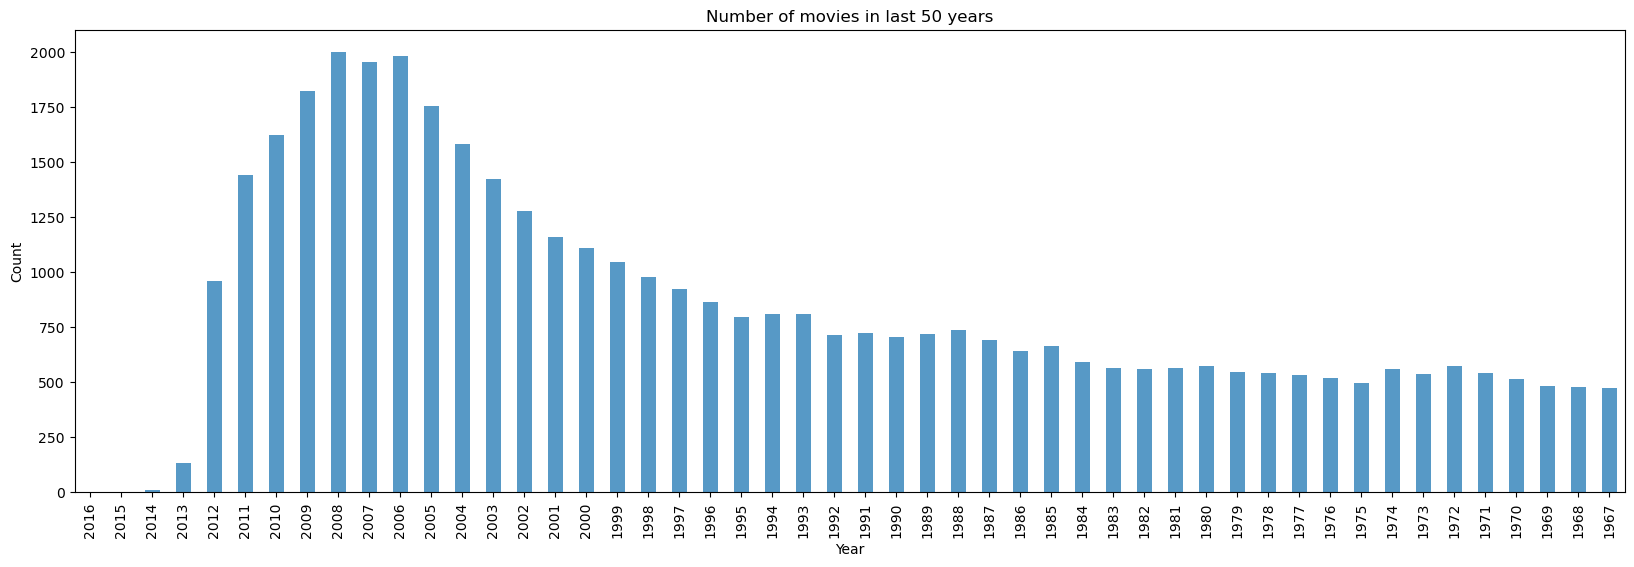

In [11]:
year_counts = movies_with_characters["Movie release date"].value_counts()
# drop nan
year_counts = year_counts[year_counts.index.str.isnumeric()]
year_counts.sort_index(ascending=False, inplace=True)
plt.figure(figsize=(20, 6))
year_counts[:50].plot(
    kind="bar",
    title="Number of movies in last 50 years",
    ylabel="Count",
    xlabel="Year",
    alpha=0.75,
)

<Figure size 1500x800 with 0 Axes>

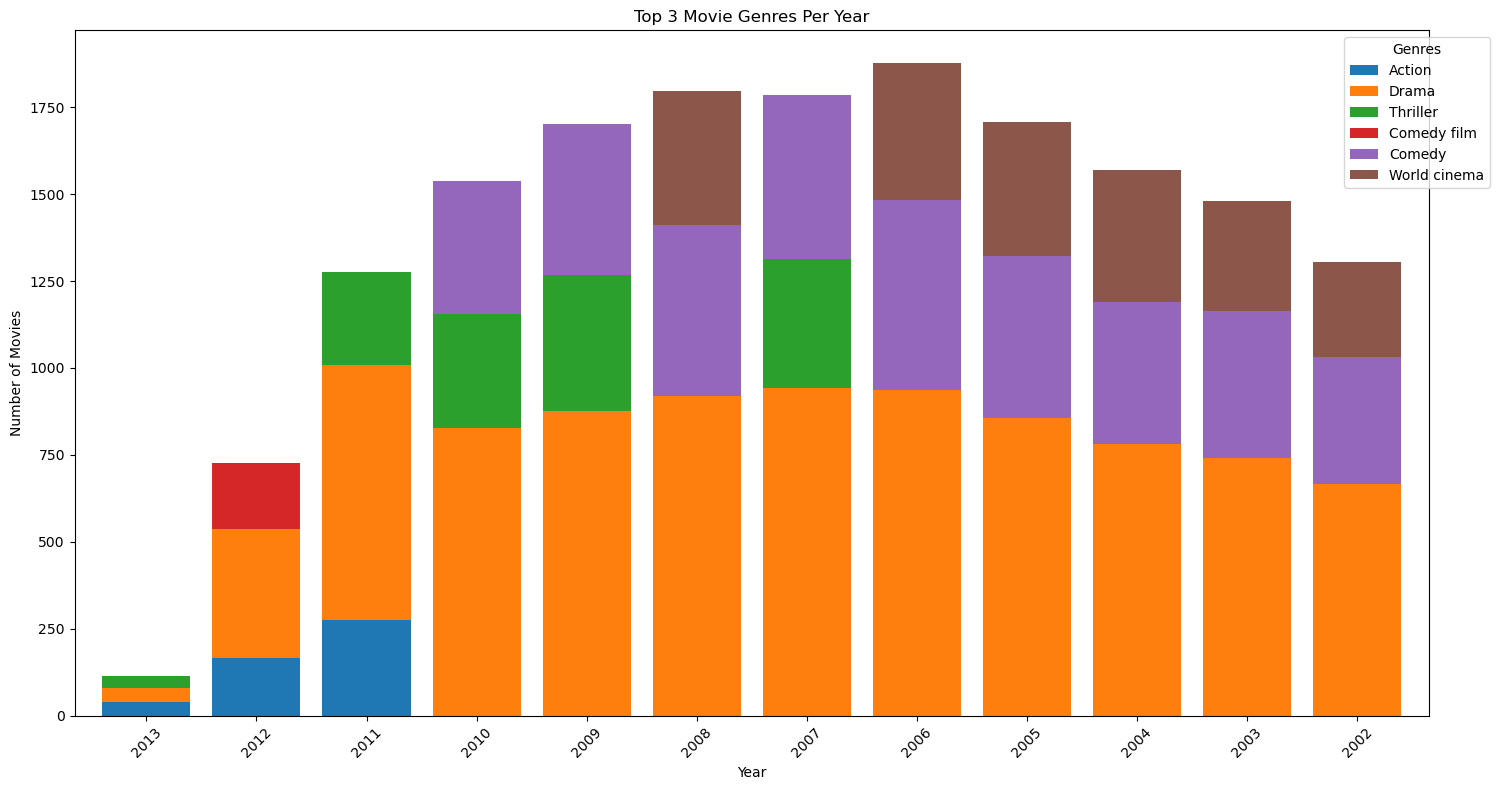

In [12]:
# Convert 'Movie release date' to numeric without modifying the original dataset
recent_years = (
    pd.to_numeric(movies_with_characters["Movie release date"], errors="coerce")
    .dropna()
    .astype(int)
    .sort_values(ascending=False)
    .unique()[3:15]
)

top_genres_per_year = pd.DataFrame()

for year in recent_years:
    # Get movies in the year
    movies_in_year = movies_with_characters[
        pd.to_numeric(movies_with_characters["Movie release date"], errors="coerce")
        == year
    ]

    # Count the genres for movies in this year
    genre_counts = (
        movies_in_year["Movie genres"].str.split(", ").explode().value_counts()
    )

    # Get the top 3 genres and their counts
    top_genres = genre_counts.head(3)

    # Add the data to the DataFrame
    top_genres_per_year = pd.concat(
        [top_genres_per_year, pd.DataFrame({year: top_genres})], axis=1
    )

# Transpose and clean up the DataFrame for plotting
top_genres_per_year = top_genres_per_year.T.fillna(0)

# Plotting the top 3 genres per year for the last 10 years
plt.figure(figsize=(15, 8))
top_genres_per_year.plot(kind="bar", stacked=True, figsize=(15, 8), width=0.8)

plt.title("Top 3 Movie Genres Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.legend(title="Genres", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Top 20 languages'}, xlabel='Movie languages', ylabel='Count'>

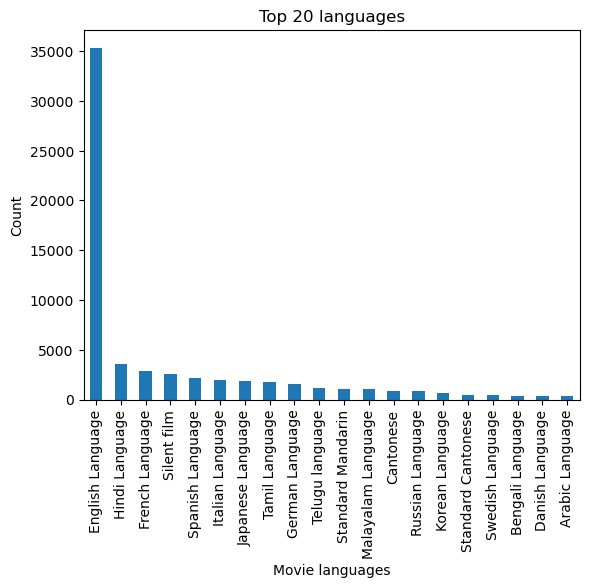

In [13]:
language_counts = (
    movies_with_characters["Movie languages"].str.split(", ").explode().value_counts()
)
language_counts
# remove the languages with less than 2 character
language_counts = language_counts[language_counts.index.str.len() > 1]
language_counts[:20].plot(kind="bar", title="Top 20 languages", ylabel="Count")

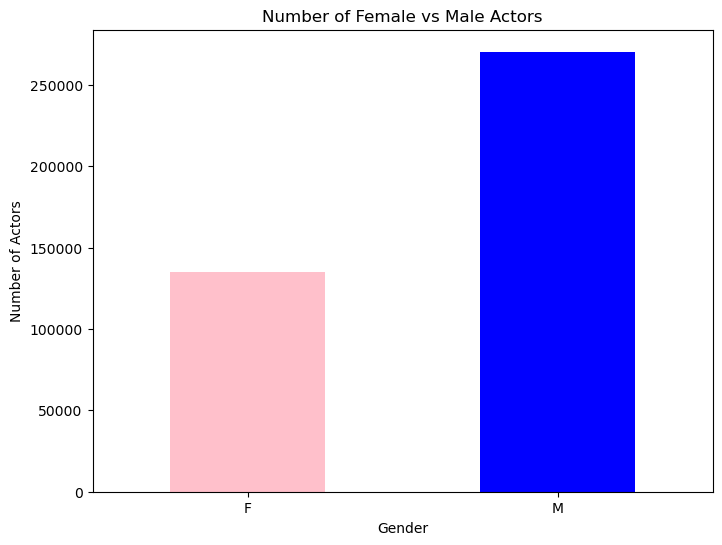

In [14]:
# Extract the 'Actor gender' column, split it by commas, and count the occurrences of 'F' and 'M'
gender_counts = (
    movies_with_characters["actor_gender"].str.split(", ").explode().value_counts()
)

plt.figure(figsize=(8, 6))
gender_counts[["F", "M"]].plot(kind="bar", color=["pink", "blue"])
plt.title("Number of Female vs Male Actors")
plt.xlabel("Gender")
plt.ylabel("Number of Actors")
plt.xticks(rotation=0)
plt.show()

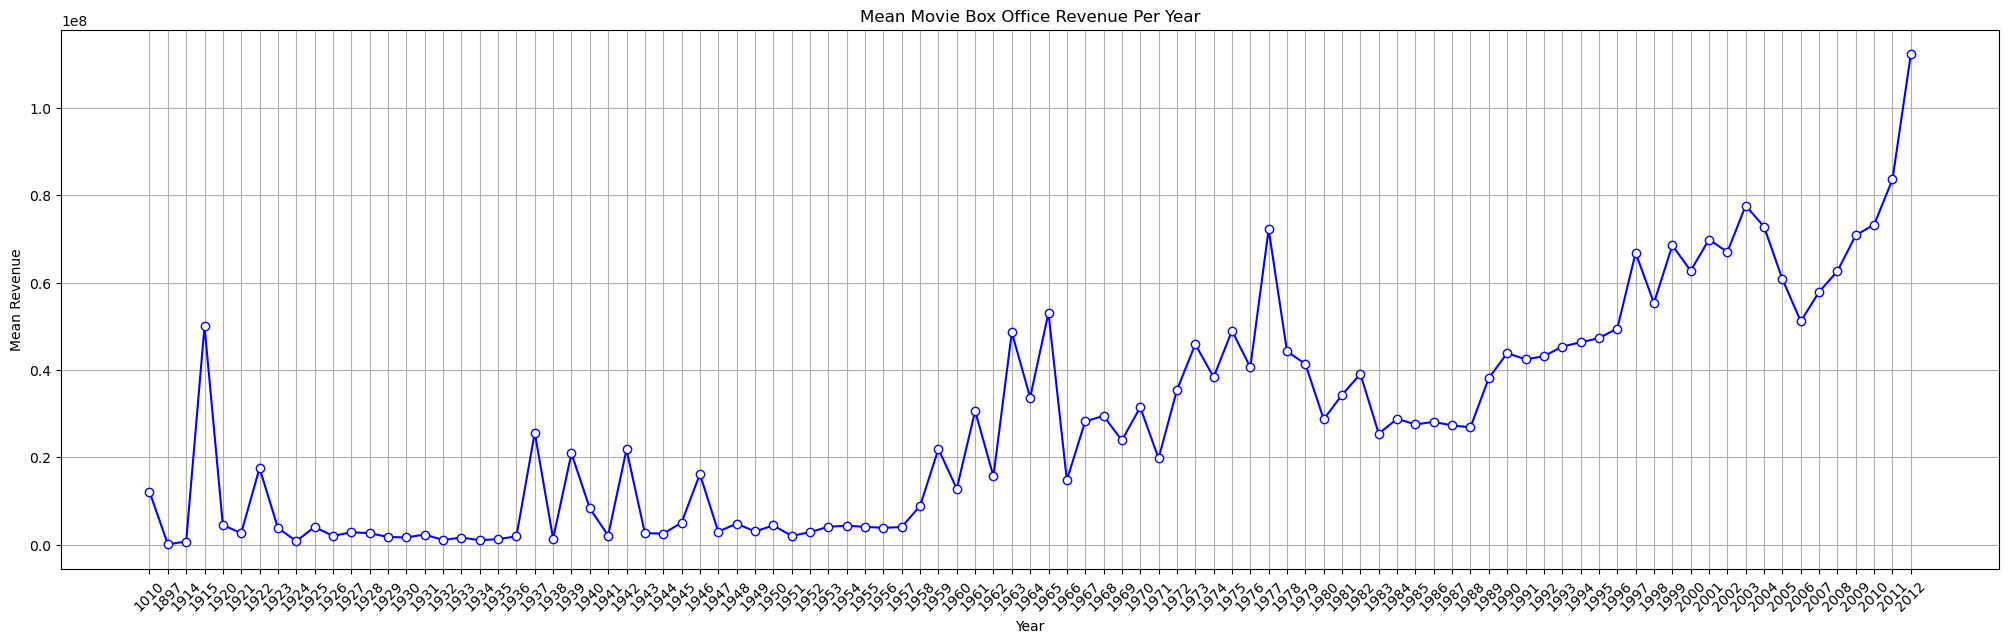

In [15]:
mean_revenue_per_year = movies_with_characters.groupby("Movie release date")[
    "Movie box office revenue"
].mean()
mean_revenue_per_year = mean_revenue_per_year.dropna()
mean_revenue_per_year = mean_revenue_per_year[mean_revenue_per_year.index != "nan"]

plt.figure(figsize=(25, 7))
plt.plot(
    mean_revenue_per_year.index,
    mean_revenue_per_year.values,
    color="b",
    marker=".",
    linestyle="solid",
    markersize=12,
    markerfacecolor="white",
)

plt.title("Mean Movie Box Office Revenue Per Year")
plt.xlabel("Year")
plt.ylabel("Mean Revenue")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [16]:
#We compute the correlation matrix 
import seaborn as sns
import numpy as np

# Create numerical features from categorical variables
def create_feature_matrix(df):
    # Create gender ratio feature (M-F)
    gender_splits = df['actor_gender'].str.split(', ').apply(lambda x: 
        pd.Series([
            len([g for g in x if g == 'M']),
            len([g for g in x if g == 'F'])
        ])
    )
    gender_ratio = gender_splits[0] - gender_splits[1]
    
    # Get top 5 ethnicities
    top_ethnicities = (
        df['ethnicity'].str.split(', ')
        .explode()
        #.loc[lambda x: x.index != 'nan']
        .value_counts()
        .iloc[1:7]
        .index
    )
    display(top_ethnicities)
    
    # Create dummy variables for top 5 ethnicities only
    ethnicity_dummies = (
        df['ethnicity'].str.get_dummies(sep=', ')
        .reindex(columns=top_ethnicities, fill_value=0)
    )
    
    # Create dummy variables for genres
    top_5_genres = (
        df['Movie genres'].str.split(", ")
        .explode()
        .value_counts()
        .head(5)
        .index
    )
    
    # Create dummy variables for only top 7 genres
    genre_dummies = (
        df['Movie genres'].str.get_dummies(sep=', ')
        .reindex(columns=top_5_genres, fill_value=0)
    )
        
    
    # Combine all features
    feature_matrix = pd.concat([
        pd.DataFrame({
            'revenue': df['Movie box office revenue'],
            'release_year': pd.to_numeric(df['Movie release date'], errors='coerce'),
            'gender_ratio': gender_ratio
        }),
        genre_dummies,
        ethnicity_dummies
    ], axis=1)
    
    return feature_matrix

Index(['Indian', 'African Americans', 'Jewish people', 'English people',
       'Irish Americans', 'Italian Americans'],
      dtype='object', name='ethnicity')

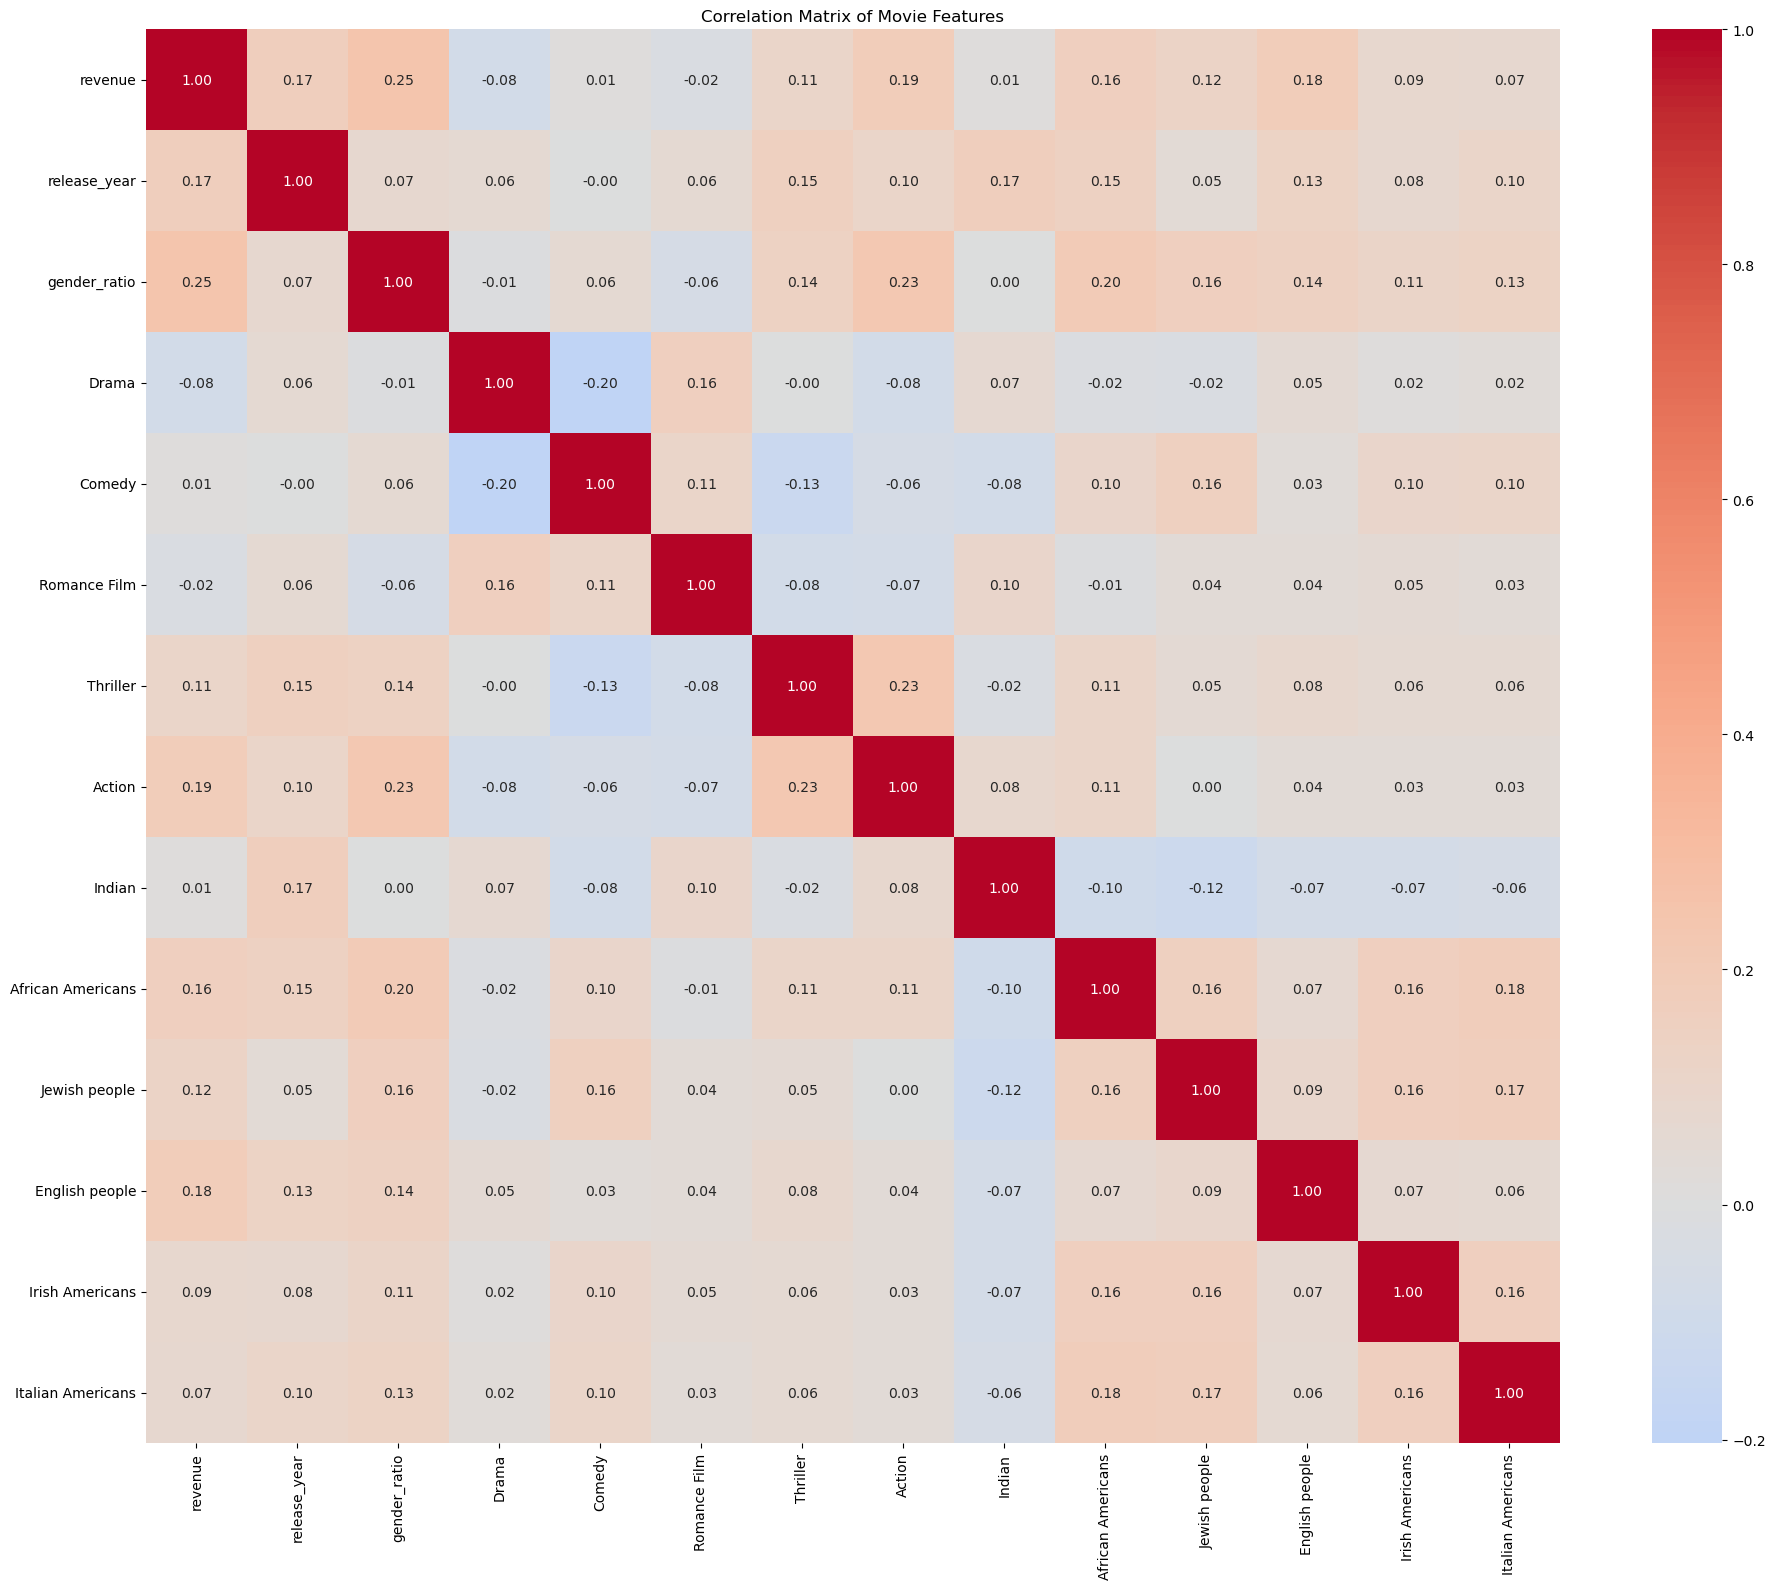


Top 5 positive correlations with revenue:
revenue           1.000000
gender_ratio      0.252731
Action            0.185813
English people    0.184258
release_year      0.166999
Name: revenue, dtype: float64

Top 5 negative correlations with revenue:
Italian Americans    0.073961
Comedy               0.014356
Indian               0.011962
Romance Film        -0.024115
Drama               -0.080775
Name: revenue, dtype: float64


In [17]:
# Create the feature matrix
feature_matrix = create_feature_matrix(movies_with_characters)

# Compute and plot correlation matrix
plt.figure(figsize=(20, 16))
correlation_matrix = feature_matrix.corr()

# Plot heatmap
sns.heatmap(correlation_matrix, 
            cmap='coolwarm', 
            center=0,
            annot=True,  
            fmt='.2f',
            square=True)

plt.title('Correlation Matrix of Movie Features')
plt.tight_layout()
plt.show()

# If you want to see the top correlations with revenue
revenue_correlations = correlation_matrix['revenue'].sort_values(ascending=False)
print("\nTop 5 positive correlations with revenue:")
print(revenue_correlations.head(5))
print("\nTop 5 negative correlations with revenue:")
print(revenue_correlations.tail(5))

20k movies don't have any characters

We will not merge name clusters because there is a baseline bias - we would only consider movies that have been successful and have sequels

In [ ]:
# Add these imports
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer

# Preprocess and vectorize the plot text
tfidf = TfidfVectorizer(
    max_features=1000,  # Limit to top 1000 terms
    stop_words="english",
    ngram_range=(1, 2),  # Consider both single words and bigrams
    min_df=5,  # Ignore terms that appear in less than 5 documents
)

# Create document-term matrix
plot_features = tfidf.fit_transform(movies_with_characters["plot"])

# Reduce dimensionality (optional but recommended for better clustering)
svd = TruncatedSVD(n_components=100)
plot_features_reduced = svd.fit_transform(plot_features)

# Cluster the movies
n_clusters = 20  # You can adjust this number
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
movies_with_characters["cluster"] = kmeans.fit_predict(plot_features_reduced)


# Analyze the clusters
def get_top_terms_per_cluster():
    # Get the cluster centers in terms of the original TF-IDF features
    original_space_centroids = svd.inverse_transform(kmeans.cluster_centers_)

    for cluster in range(n_clusters):
        top_indices = np.argsort(original_space_centroids[cluster])[
            -10:
        ]  # Top 10 terms
        top_terms = [tfidf.get_feature_names_out()[i] for i in top_indices]
        print(f"\nCluster {cluster} top terms:")
        print(", ".join(top_terms))


# Display results
get_top_terms_per_cluster()